<a href="https://colab.research.google.com/github/shriver42/ESAA/blob/%EC%97%B0%EC%8A%B5-%EB%AC%B8%EC%A0%9C/YB_4_5_%EC%84%B8%EC%85%98_%EB%AC%B8%EC%A0%9C_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix,precision_recall_curve,roc_curve

* 오차 행렬(혼동 행렬) 생성

In [39]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
confusion = confusion_matrix(y,y_pred)
print(confusion)

[[337  20]
 [ 30 182]]


* 정확도

In [40]:
accuracy = accuracy_score(y,y_pred)
print(accuracy)

0.9121265377855887


* 정밀도

In [41]:
precision = precision_score(y,y_pred)
print(precision)

0.900990099009901


* 재현율

In [42]:
recall = recall_score(y,y_pred)
print(recall)

0.8584905660377359


* F1 score

In [43]:
f1 = f1_score(y,y_pred)
print(f1)

0.8792270531400966


* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [44]:
from sklearn.preprocessing import Binarizer
import numpy as np
y_pred2= (model_lor.predict_proba(X)[:,1]>0.1)

In [45]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
print('혼동 행렬')
print(confusion)
print('정확도')
print(accuracy)
print('정밀도')
print(precision)
print('재현율')
print(recall)
print('f1 score')
print(f1)

혼동 행렬
[[337  20]
 [ 30 182]]
정확도
0.9121265377855887
정밀도
0.900990099009901
재현율
0.8584905660377359
f1 score
0.8792270531400966


* ROC 곡선 시각화

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve
probas = model_lor.predict_proba(X)

fpr, tpr, thresholds = roc_curve(y, probas[:,1])

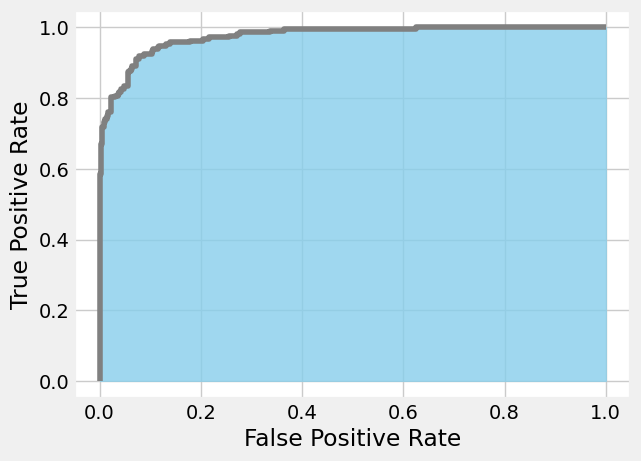

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

ax.step(fpr, tpr, 'gray')
ax.fill_between(fpr, tpr, 0, color='skyblue', alpha=0.8)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_facecolor('xkcd:white')
plt.show()

* ROC AUC 값

In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, probas[:,1])

0.9741424871835527